## MNIST pour la classification de l'ecriture manuscrite par des Réseaux de neurones artificiels (ANN)
La base de données utilisée est celle de MNIST (http://yann.lecun.com/exdb/mnist/ ). Ce problème de reconnaissance de l'écriture manuscrite est un problème difficile, et un bon test pour les algorithmes d'apprentissage. La base MNIST est un test qui regroupe 60000 images d'apprentissage et 10000 images de test. Ce sont des images en noir et blanc, normalisées centrées de 28*28 pixels. Nous allons utiliser les réseaux multicouches pour résoudre ce problème de reconnaissance

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist #importation du dataset
num_samples = 10

(x_train , y_train) , (x_test , y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
x_train , x_test = x_train/255 , x_test/255

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256 , activation = 'relu' , kernel_regularizer = tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128 , activation = 'relu' , kernel_regularizer = tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64 , activation = 'relu' , kernel_regularizer = tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10 , activation='softmax')

])
model.compile(optimizer = 'Adam' , loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 10 , zoom_range =0.1 , width_shift_range = 0.1, height_shift_range= 0.1
)
datagen.fit(x_train.reshape(-1,28,28,1))
history = model.fit(x_train , y_train , epochs=30 , verbose=2 , validation_data = (x_test , y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1875/1875 - 14s - 8ms/step - accuracy: 0.8546 - loss: 0.5388 - val_accuracy: 0.9555 - val_loss: 0.2077
Epoch 2/30
1875/1875 - 14s - 7ms/step - accuracy: 0.9229 - loss: 0.3309 - val_accuracy: 0.9637 - val_loss: 0.1868
Epoch 3/30
1875/1875 - 5s - 3ms/step - accuracy: 0.9344 - loss: 0.2993 - val_accuracy: 0.9691 - val_loss: 0.1742
Epoch 4/30
1875/1875 - 5s - 3ms/step - accuracy: 0.9430 - loss: 0.2756 - val_accuracy: 0.9728 - val_loss: 0.1717
Epoch 5/30
1875/1875 - 6s - 3ms/step - accuracy: 0.9468 - loss: 0.2663 - val_accuracy: 0.9731 - val_loss: 0.1669
Epoch 6/30
1875/1875 - 5s - 3ms/step - accuracy: 0.9505 - loss: 0.2537 - val_accuracy: 0.9747 - val_loss: 0.1673
Epoch 7/30
1875/1875 - 6s - 3ms/step - accuracy: 0.9516 - loss: 0.2518 - val_accuracy: 0.9744 - val_loss: 0.1681
Epoch 8/30
1875/1875 - 5s - 3ms/step - accuracy: 0.9547 - loss: 0.2449 - val_accuracy: 0.9746 - val_loss: 0.1674
Epoch 9/30
1875/1875 - 6s - 3ms/step - accuracy: 0.9545 - loss: 0.2426 - val_accuracy: 0.9749 

In [ ]:
#Evaluation du modèle
score = model.evaluate(x_test , y_test , verbose =1)
print('loss:',score[0])
print('accuracy:',score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.1691
loss: 0.15249153971672058
accuracy: 0.9785000085830688


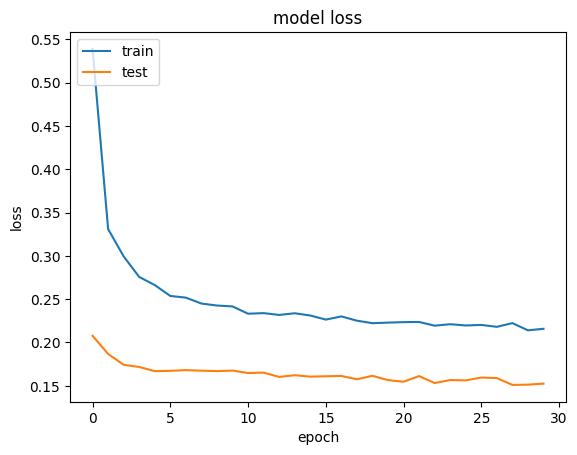

In [ ]:
#Construire la courbe des pertes (loss) en fonction du nombre d’époques
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test' ],loc='upper left')
plt.show()

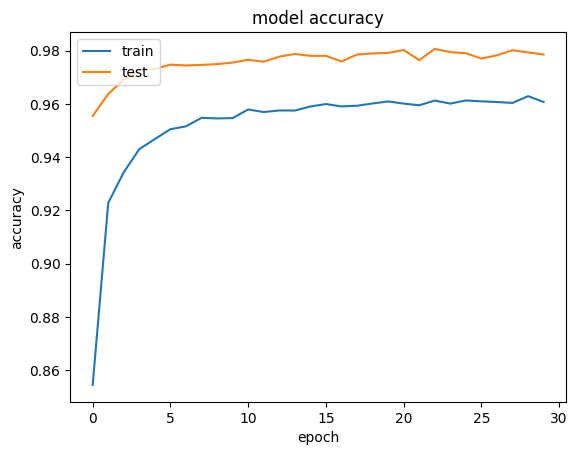

In [ ]:
#Construire la courbe d’accuracy en fonction du nombre d’époques

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()